<a href="https://colab.research.google.com/github/khodjasCode/predicted_prices_of_houses_ML/blob/main/LinerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head(10)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30,1,4,22200


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [ ]:
if df.isnull().sum().any():
  df = df.dropna()

In [ ]:
df = df[df.price != 'Договорная']

In [ ]:
df['price'] = pd.to_numeric(df['price']).astype(float)

In [ ]:
df.loc[df['size'] == 'Площадьземли:1сот', 'size'] = 100

In [ ]:
df['size'] = pd.to_numeric(df['size']).astype(float)

In [ ]:
import numpy as np

max_price = np.max(df['price'].values)  # Access the 'price' column and get its maximum value using NumPy
print(max_price)

52000000.0


In [ ]:
df = df[df.price != 52000000.0]

In [ ]:
df = df.drop(df.sort_values(by=['price'], ascending=False).head(15).index)

In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7450.000000,7450.000000,7450.000000,7450.000000,7450.000000
mean,2.619597,113.455281,3.694094,6.024027,58517.746980
std,1.076104,1502.653680,2.237054,2.608131,43218.073962
min,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,85.000000,5.000000,9.000000,66452.500000
max,10.000000,70000.000000,19.000000,25.000000,425600.000000


In [ ]:
df['district'].value_counts()

,count
district,
Чиланзарский,1627
Мирзо-Улугбекский,1366
Юнусабадский,875
Учтепинский,874
Мирабадский,769
Яккасарайский,650
Яшнободский,467
Шайхантахурский,373
Олмазорский,266


**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [ ]:
housing = df[df.district=='Чиланзарский']
housing.sample(5)

,location,district,rooms,size,level,max_levels,price
3557,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,2,52.0,4,4,33000.0
1400,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,3,75.0,1,4,64000.0
943,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,2,50.0,1,5,34500.0
7206,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1,30.0,2,4,21000.0
2251,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,2,51.0,1,4,39500.0


In [ ]:
X = housing['size']
X

,size
2,42.0
3,65.0
4,70.0
5,28.0
6,30.0
...,...
7504,70.0
7522,20.0
7533,32.0
7545,70.0


In [ ]:
y = housing['price']
y

,price
2,37000.0
3,49500.0
4,55000.0
5,25500.0
6,21200.0
...,...
7504,48000.0
7522,18500.0
7533,28000.0
7545,49800.0


**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

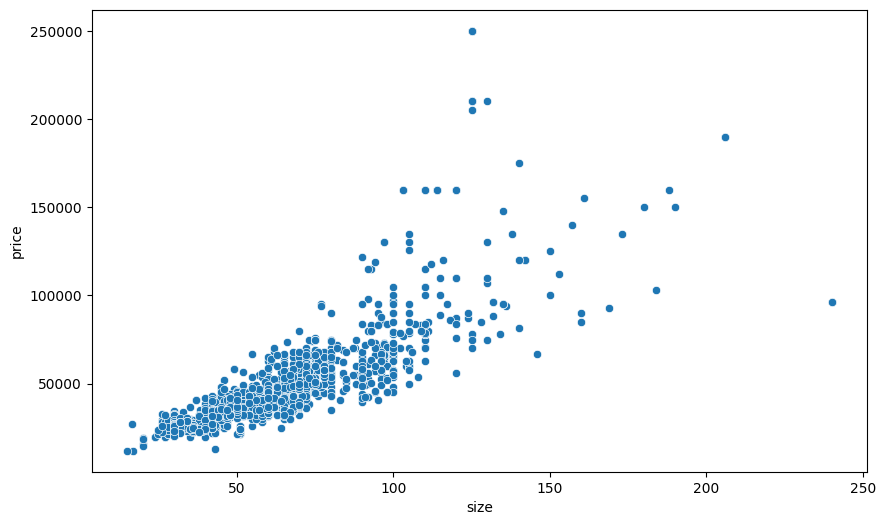

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

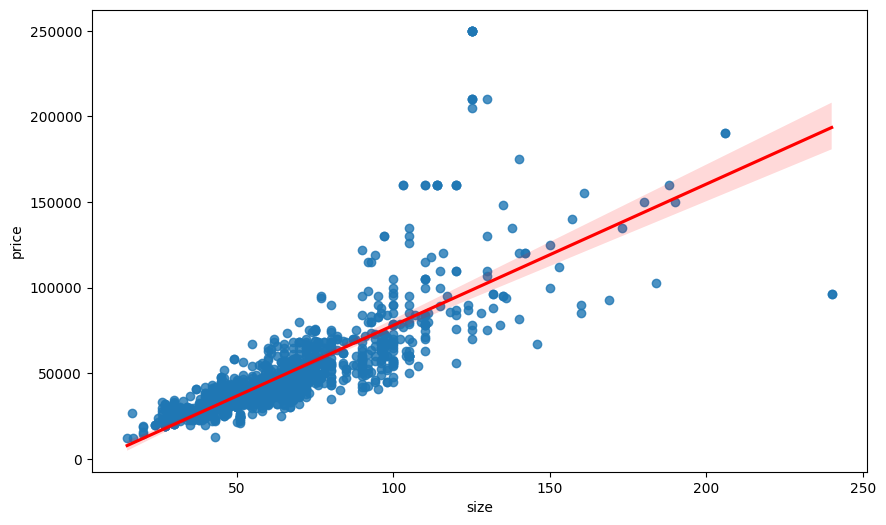

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [ ]:
numerator = ((X - X.mean()) * (y - y.mean())).sum()
denominator = ((X - X.mean()) ** 2).sum()
theta_1 = numerator / denominator

In [ ]:
theta_0 = y.mean() - theta_1 * X.mean()

In [ ]:
print(f"θ1 (Slope): {theta_1}")
print(f"θ0 (Intercept): {theta_0}")

θ1 (Slope): 825.2816777093782
θ0 (Intercept): -4572.669400872117


In [ ]:
theta_1 * 100 + theta_0 # 100 kv.m uchun

77955.4983700657

In [ ]:
df[(df['size'] == 100) & (df['district'] == 'Чиланзарский')]

,location,district,rooms,size,level,max_levels,price
47,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,100.0,1,4,97000.0
375,"город Ташкент, Чиланзарский район, Алгоритм",Чиланзарский,3,100.0,1,12,57000.0
574,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,100.0,7,9,65000.0
1034,"город Ташкент, Чиланзарский район, Домбрабад",Чиланзарский,4,100.0,6,9,67500.0
1253,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,100.0,9,9,48000.0
1353,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,100.0,1,4,100000.0
1464,"город Ташкент, Чиланзарский район, Чиланзар 5 ...",Чиланзарский,3,100.0,6,9,78000.0
1465,"город Ташкент, Чиланзарский район, Халклар Дус...",Чиланзарский,3,100.0,4,4,66500.0
1527,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,100.0,5,9,90000.0
2167,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,100.0,4,9,95000.0


## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [ ]:
res_pr = []
ran_val = df[df.district=='Чиланзарский'].sample(5)['size'].values
for val in ran_val:
  print(f"{val} kv.m uchun narx: {theta_1 * val + theta_0}")
  res_pr.append(theta_1 * val + theta_0)

58.9 kv.m uchun narx: 44036.42141621026
54.0 kv.m uchun narx: 39992.54119543431
77.0 kv.m uchun narx: 58974.01978275
26.0 kv.m uchun narx: 16884.654219571716
94.0 kv.m uchun narx: 73003.80830380943


In [ ]:
res = []
for val in ran_val:
    filtered_df = df[(df['district'] == 'Чиланзарский') & (df['size'] == val)]
    print(f"{val} kv.m uchun narx: {filtered_df['price'].mean()}")
    res.append(filtered_df['price'].mean())


58.9 kv.m uchun narx: 55000.0
54.0 kv.m uchun narx: 37000.0
77.0 kv.m uchun narx: 63666.666666666664
26.0 kv.m uchun narx: 27100.0
94.0 kv.m uchun narx: 67016.375


## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(res, res_pr)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(res, res_pr)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 6970.309149475686
Root Mean Squared Error (RMSE): 7633.858001400308
